In [2]:
# import pydot, graphviz
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import keras
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate, GlobalAveragePooling2D, Reshape
from tensorflow.keras.layers import Permute
from keras.utils import np_utils
from keras.models import Model
from tensorflow.keras.applications import ResNet50
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import xml.etree.ElementTree as ET
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import Model
import torch
from transformers import ViTFeatureExtractor

C:\Anaconda\envs\deep_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mapping = {
    "1_chongkong" : 0,
    "2_hanfeng" : 1,
    "3_yueyawan": 2,
    "4_shuiban": 3,
    "5_youban": 4,
    "6_siban": 5,
    "7_yiwu": 6,
    "8_yahen": 11,
    "9_zhehen": 7,
    "10_yaozhed": 8,
    "scratches": 9,
    "rolled-in_scale": 10
}
mapping2 = {
    0 : "Punching Hole",
    1 : "Welding Line",
    2 : "Crescent Gap",
    3 : "Water Spot",
    4 : "Oil Spot",
    5 : "Silk Spot",
    6 : "Inclusion",
    11 : "Rolled Pit",
    7 : "Crease",
    8 : "Waist Folding",
    9 : "Scratches",
    10 : "Rolled in Scale"
}

In [4]:
X = []
y = []
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

In [5]:
w_factor = 2048/224.0
l_factor = 1000/224.0
w = 224
l = 224
w_factor_2 = 200/224.0
l_factor_2 = 200/224.0

In [6]:
def get_annotations(directory):

    try:
        tree = ET.parse(directory)
        root = tree.getroot()
        boxes = []

        defect = -1
        objs = root.findall('object')
        for i in objs:
            name = i.find('name').text
            defect = mapping.get(name, 12)
            if defect != 12 and defect != 11:
                box = i.find('bndbox')
                xmin = float(box.find('xmin').text)
                ymin = float(box.find('ymin').text)
                xmax = float(box.find('xmax').text)
                ymax = float(box.find('ymax').text)

                if defect == -1:
                    return 0
                if xmin > xmax:
                    temp = xmin
                    xmin = xmax
                    xmax = temp
                if ymin > ymax:
                    temp = ymin
                    ymin = ymax
                    ymax = temp

                box = []
                for i in range(5):
                    box.append(-1)
                box[0] = defect
                box[1] = (xmin)/w_factor
                box[2] = (ymin)/l_factor
                box[3] = (xmax)/w_factor
                box[4] = (ymax)/l_factor
                boxes.append(box)
            else:
                defect = -1
        if defect == -1:
            return 0
        return boxes
    except:
        return 0

In [7]:
def get_annotations_2(directory):

    try:
        tree = ET.parse(directory)
        root = tree.getroot()
        boxes = []

        defect = -1
        objs = root.findall('object')
        for i in objs:
            name = i.find('name').text
            defect = mapping.get(name, 12)
            if defect != 12 and defect != 11:
                box = i.find('bndbox')
                xmin = float(box.find('xmin').text)
                ymin = float(box.find('ymin').text)
                xmax = float(box.find('xmax').text)
                ymax = float(box.find('ymax').text)

                if defect == -1:
                    return 0
                if xmin > xmax:
                    temp = xmin
                    xmin = xmax
                    xmax = temp
                if ymin > ymax:
                    temp = ymin
                    ymin = ymax
                    ymax = temp

                box = []
                for i in range(5):
                    box.append(-1)

                box[0] = defect
                box[1] = (xmin)/w_factor_2
                box[2] = (ymin)/l_factor_2
                box[3] = (xmax)/w_factor_2
                box[4] = (ymax)/l_factor_2
                boxes.append(box)
            else:
                defect = -1
        if defect == -1:
            return 0
        return boxes
    except:
        return 0

In [8]:
# cd "C:\\Users\\Toqa Alaa\\PBL2"

In [9]:
#Displaying sample data for all classes
path ='gc10det/crease'
for img in os.listdir(path):
    img_array1 = cv2.imread(os.path.join(path,img))
    img_array1 = cv2.resize(img_array1, (100, 100))
    break

path ='gc10det/crescent_gap'
for img in os.listdir(path):
    img_array2 = cv2.imread(os.path.join(path,img))
    img_array2 = cv2.resize(img_array2, (100, 100))
    break


path ='gc10det/inclusion'
for img in os.listdir(path):
    img_array3 = cv2.imread(os.path.join(path,img))
    img_array3 = cv2.resize(img_array3, (100, 100))
    break


path ='gc10det/oil_spot'
for img in os.listdir(path):
    img_array4 = cv2.imread(os.path.join(path,img))
    img_array4 = cv2.resize(img_array4, (100, 100))
    break

path ='gc10det/punching_hole'
for img in os.listdir(path):
    img_array5 = cv2.imread(os.path.join(path,img))
    img_array5 = cv2.resize(img_array5, (100, 100))
    break

path ='gc10det/rolled_in_scale'
for img in os.listdir(path):
    img_array6 = cv2.imread(os.path.join(path,img))
    img_array6 = cv2.resize(img_array6, (100, 100))
    break

path ='gc10det/scratches'
for img in os.listdir(path):
    img_array7 = cv2.imread(os.path.join(path,img))
    img_array7 = cv2.resize(img_array7, (100, 100))
    break


path ='gc10det/silk_spot'
for img in os.listdir(path):
    img_array8 = cv2.imread(os.path.join(path,img))
    img_array8 = cv2.resize(img_array8, (100, 100))
    break


path ='gc10det/waist_folding'
for img in os.listdir(path):
    img_array9 = cv2.imread(os.path.join(path,img))
    img_array9 = cv2.resize(img_array9, (100, 100))
    break

path ='gc10det/water_spot'
for img in os.listdir(path):
    img_array10 = cv2.imread(os.path.join(path,img))
    img_array10 = cv2.resize(img_array10, (100, 100))
    break

path ='gc10det/welding_line'
for img in os.listdir(path):
    img_array11 = cv2.imread(os.path.join(path,img))
    img_array11 = cv2.resize(img_array11, (100, 100))
    break

fig = plt.figure(figsize=(15, 15))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[1, 1, 1], wspace=0.4,
                         hspace=0.4, height_ratios=[1, 1, 1, 1])
ax1 = fig.add_subplot(3, 4, 1)
ax1.imshow(img_array1, cmap='gray')
fig.suptitle("Sample images for 11 classes")
ax1.set_title("Crease")
ax2 = fig.add_subplot(3, 4, 2)
ax2.imshow(img_array2, cmap='gray')
ax2.set_title("Crescent Gap")
ax3 = fig.add_subplot(3, 4, 3)
ax3.imshow(img_array3, cmap='gray')
ax3.set_title("Inclusion")
ax4 = fig.add_subplot(3, 4, 4)
ax4.imshow(img_array4, cmap='gray')
ax4.set_title("Oil Spot")
ax5 = fig.add_subplot(3, 4, 5)
ax5.imshow(img_array5, cmap='gray')
ax5.set_title("Punching Hole")
ax6 = fig.add_subplot(3, 4, 6)
ax6.imshow(img_array6, cmap='gray')
ax6.set_title("Rolled in Scale")
ax7 = fig.add_subplot(3, 4, 7)
ax7.imshow(img_array7, cmap='gray')
ax7.set_title("Scratches")
ax8 = fig.add_subplot(3, 4, 8)
ax8.imshow(img_array8, cmap='gray')
ax8.set_title("Silk Spot")
ax9 = fig.add_subplot(3, 4, 9)
ax9.imshow(img_array9, cmap='gray')
ax9.set_title("Waist Folding")
ax10 = fig.add_subplot(3, 4, 10)
ax10.imshow(img_array10, cmap='gray')
ax10.set_title("Water Spot")
ax11 = fig.add_subplot(3, 4, 11)
ax11.imshow(img_array11, cmap='gray')
ax11.set_title("Welding Line")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'gc10det/crease'

In [ ]:
for i in range(1, 54):
    annotation = get_annotations(fr'lable/crease ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/crease/crease ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 227):
    annotation = get_annotations(fr'lable/crescent_gap ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/crescent_gap/crescent_gap ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 493):
    if i<217:
        annotation = get_annotations(fr'lable/inclusion ({i}).xml')
    else:
        annotation = get_annotations_2(fr'lable/inclusion ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/inclusion/inclusion ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 205):
    annotation = get_annotations(fr'lable/oil_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/oil_spot/oil_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 220):
    annotation = get_annotations(fr'lable/punching_hole ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/punching_hole/punching_hole ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 277):
    annotation = get_annotations_2(fr'lable/rolled_in_scale ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/rolled_in_scale/rolled_in_scale ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 277):
    annotation = get_annotations_2(fr'lable/scratches ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/scratches/scratches ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 652):
    annotation = get_annotations(fr'lable/silk_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/silk_spot/silk_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 150):
    annotation = get_annotations(fr'lable/waist_folding ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/waist_folding/waist_folding ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 290):
    annotation = get_annotations(fr'lable/water_spot ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/water_spot/water_spot ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

for i in range(1, 274):
    annotation = get_annotations(fr'lable/welding_line ({i}).xml')
    if(annotation):
        img = cv2.imread(fr'gc10det/welding_line/welding_line ({i}).jpg')
        img = cv2.resize(img, (w, l))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= np.expand_dims(img, axis=0)
        X.append(img)
        y.append(annotation)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [ ]:
classes_train = []
dims_train = []
for i in range(len(y_train)):
    tmp_classes = []
    tmp_dims = []
    for j in range(len(y_train[i])):
        tmp_classes.append(y_train[i][j][0])
        tmp_dims.append(y_train[i][j][1:])
    classes_train.append(tmp_classes)
    dims_train.append(tmp_dims)

classes_val = []
dims_val = []
for i in range(len(y_val)):
    tmp_classes = []
    tmp_dims = []
    for j in range(len(y_val[i])):
        tmp_classes.append(y_val[i][j][0])
        tmp_dims.append(y_val[i][j][1:])
    classes_val.append(tmp_classes)
    dims_val.append(tmp_dims)

classes_test = []
dims_test = []
for i in range(len(y_test)):
    tmp_classes = []
    tmp_dims = []
    for j in range(len(y_test[i])):
        tmp_classes.append(y_test[i][j][0])
        tmp_dims.append(y_test[i][j][1:])
    classes_test.append(tmp_classes)
    dims_test.append(tmp_dims)

In [ ]:
X_train = np.array(X_train, dtype = 'float')
X_test = np.array(X_test, dtype = 'float')
X_val = np.array(X_val, dtype = 'float')


#X_train /= 255.0
#X_test /= 255
#X_val/= 255.0

In [ ]:
def extract_min(lst, index):
    minn = 10000000
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            if lst[i][j][index] < minn:
                minn = lst[i][j][index]
    return minn

def extract_max(lst, index):
    maxx = -10000000
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            if lst[i][j][index] > maxx:
                maxx = lst[i][j][index]
    return maxx

In [ ]:
def maxminscaler(lst, maxx, minn, index):
    for i in range(len(lst)):
        for j in range(len(lst[i])):
            lst[i][j][index] = (lst[i][j][index] - minn)/(maxx - minn)
    return lst

In [ ]:
xmin_min = extract_min(dims_train, 0)
xmin_max = extract_max(dims_train, 0)
xmax_min = extract_min(dims_train, 1)
xmax_max = extract_max(dims_train, 1)
ymin_min = extract_min(dims_train, 2)
ymin_max = extract_max(dims_train, 2)
ymax_min = extract_min(dims_train, 3)
ymax_max = extract_max(dims_train, 3)

In [ ]:
dims_train = maxminscaler(dims_train, xmin_min, xmin_max, 0)
dims_train = maxminscaler(dims_train, xmax_min, xmax_max, 1)
dims_train = maxminscaler(dims_train, ymin_min, ymin_max, 2)
dims_train = maxminscaler(dims_train, ymax_min, ymax_max, 3)

dims_val = maxminscaler(dims_val, xmin_min, xmin_max, 0)
dims_val = maxminscaler(dims_val, xmax_min, xmax_max, 1)
dims_val = maxminscaler(dims_val, ymin_min, ymin_max, 2)
dims_val = maxminscaler(dims_val, ymax_min, ymax_max, 3)

dims_test = maxminscaler(dims_test, xmin_min, xmin_max, 0)
dims_test = maxminscaler(dims_test, xmax_min, xmax_max, 1)
dims_test = maxminscaler(dims_test, ymin_min, ymin_max, 2)
dims_test = maxminscaler(dims_test, ymax_min, ymax_max, 3)

In [ ]:
maximum_defects = 0
for i in dims_val:
    if len(i) > maximum_defects:
        maximum_defects = len(i)

print(maximum_defects)

11


In [ ]:
def pad_dims(lst):
    pad = [0, 0, 0, 0]
    for i in range(len(lst)):
        for _ in range(11 - len(lst[i])):
            lst[i].append(pad)
    return lst

def pad_classes(lst):
    pad = -1
    for i in range(len(lst)):
        for _ in range(11 - len(lst[i])):
            lst[i].append(pad)
    return lst

In [ ]:
dims_train = pad_dims(dims_train)
dims_val = pad_dims(dims_val)
dims_test = pad_dims(dims_test)
classes_train = pad_classes(classes_train)
classes_val = pad_classes(classes_val)
classes_test = pad_classes(classes_test)

In [ ]:
num_classes = 12

for i in range(len(classes_train)):
    classes_train[i] = np.array(classes_train[i], dtype = 'float').astype('float64').reshape((-1,1))
    classes_train[i] = np_utils.to_categorical(classes_train[i], num_classes=num_classes)

for i in range(len(dims_train)):
    dims_train[i] = np.array(dims_train[i], dtype = 'float')

for i in range(len(classes_val)):
    classes_val[i] = np.array(classes_val[i], dtype = 'float').astype('float64').reshape((-1,1))
    classes_val[i] = np_utils.to_categorical(classes_val[i], num_classes=num_classes)

for i in range(len(dims_val)):
    dims_val[i] = np.array(dims_val[i], dtype = 'float')

for i in range(len(classes_test)):
    classes_test[i] = np.array(classes_test[i], dtype = 'float').astype('float64').reshape((-1,1))
    classes_test[i] = np_utils.to_categorical(classes_test[i], num_classes=num_classes)

for i in range(len(dims_test)):
    dims_test[i] = np.array(dims_test[i], dtype = 'float')

num_regressors = 4

In [ ]:
for i in range(len(dims_val)):
    if (len(dims_val[i])!=11):
        print(i)
    #print(len(i))
#dims_val[288]

In [ ]:
print(len(dims_train[0]))
dims_train = np.array(dims_train, dtype = 'float')
dims_val = np.array(dims_val, dtype = 'float')
dims_test = np.array(dims_test, dtype = 'float')
classes_train = np.array(classes_train, dtype = 'float')
classes_val = np.array(classes_val, dtype = 'float')
classes_test = np.array(classes_test, dtype = 'float')

11


In [ ]:
model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

C:\anaconda3\envs\deeplearning\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
feature_extractor.image_mean=[0.5]
feature_extractor.image_std= [0.5]

In [ ]:
X_train_ext = feature_extractor(X_train, return_tensors='tf')
X_train_ext = X_train_ext['pixel_values'].numpy()
X_val_ext = feature_extractor(X_val, return_tensors='tf')
X_val_ext = X_val_ext['pixel_values'].numpy()
X_test_ext = feature_extractor(X_test, return_tensors='tf')
X_test_ext = X_test_ext['pixel_values'].numpy()

In [ ]:
X_test_ext.shape

(263, 1, 224, 224)

In [ ]:
X_train_ext[700]

array([[[-0.8352941 , -0.84313726, -0.8745098 , ..., -0.60784316,
         -0.6       , -0.5764706 ],
        [-0.827451  , -0.827451  , -0.8666667 , ..., -0.58431375,
         -0.5921569 , -0.5921569 ],
        [-0.85882354, -0.84313726, -0.8509804 , ..., -0.5921569 ,
         -0.5921569 , -0.6       ],
        ...,
        [-0.84313726, -0.8352941 , -0.84313726, ..., -0.5921569 ,
         -0.60784316, -0.60784316],
        [-0.84313726, -0.84313726, -0.8352941 , ..., -0.58431375,
         -0.6       , -0.6       ],
        [-0.84313726, -0.84313726, -0.8352941 , ..., -0.5686275 ,
         -0.5764706 , -0.58431375]]], dtype=float32)

In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\anaconda3\\envs\\deeplearning\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [ ]:
dims_train[8]

array([[0.39684884, 0.15123457, 0.27693064, 0.00411946],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
def my_CE(y_true, y_pred):
    # Reshape to one-dimensional tensors
    y_true = tf.reshape(y_true, shape=(-1,))
    y_pred = tf.reshape(y_pred, shape=(-1,))

    log_y_pred = tf.math.log(y_pred)
    element_wise = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
    x = tf.reduce_mean(element_wise)
    return x

def categorical_crossentropy2(y_true, y_pred):
    m = len(y_true)
    loss = tf.zeros([])
    for i in range(len(y_true)):
        for j in range(len(y_true[i])):
            loss += my_CE(y_true[i][j], y_pred[i][j])

    loss /= tf.cast(m, tf.float32)
    return loss

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8  # Allocate 80% of the available GPU memory
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [ ]:
def accuracy2(y_true, y_pred):
    m= len(y_true)
    accuracy=0
    for i in range(len(y_true)):
        for j in range(len(y_true[i])):
            mask = tf.not_equal(tf.argmax(y_true[i][j], axis=-1), 11)  # Exclude class 12 (index 11)
            if (not mask): continue

            correct_predictions = tf.equal(tf.argmax(y_true[i][j], axis=-1), tf.argmax(y_pred[i][j], axis=-1))
            accuracy += tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

    accuracy/=m

    return accuracy

In [ ]:
keras.backend.clear_session()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('class_output_accuracy2') is not None and logs.get('class_output_accuracy2') > 0.85 \
        and logs.get('val_class_output_accuracy2') is not None and logs.get('val_class_output_accuracy2') > 0.8:
            self.model.stop_training = True

In [ ]:
callbacks= myCallback()

In [ ]:

from tensorflow.keras import initializers
input_shape = (1, 224, 224)

inputs = Input(shape=input_shape)

flatten = Flatten()(inputs)

dense_class1 = Dense(512, activation='relu', kernel_initializer=initializers.GlorotUniform(),
                    kernel_regularizer=tf.keras.regularizers.l2(0.001))(flatten)
drop1=Dropout(0.2)(dense_class1)

dense_class2 = Dense(256, activation='relu', kernel_initializer=initializers.GlorotUniform(),
                    kernel_regularizer=tf.keras.regularizers.l2(0.001))(drop1)
drop2=Dropout(0.2)(dense_class2)
output_class = Dense(11*12, activation='relu', kernel_initializer=initializers.GlorotUniform(),
                     kernel_regularizer=tf.keras.regularizers.l2(0.001))(drop2)
output_class = Reshape((11, 12))(output_class)

softmax_layers = []
for i in range(11):
    row = tf.keras.layers.Lambda(lambda x: x[:, :, i])(output_class)
    softmax= Dense(12, activation='softmax')(row)
#     softmax = tf.keras.layers.Softmax()(row)
    softmax_layers.append(softmax)

output_class2 = tf.keras.layers.Concatenate(axis=-1)(softmax_layers)
output_class2 = Reshape((11, 12), name='class_output')(output_class2)



dense_reg1 = Dense(128, activation='relu')(flatten)
dropout1= Dropout(0.2)(dense_reg1)
dense_reg2 = Dense(128, activation='relu')(dropout1)
dropout2=  Dropout(0.2)(dense_reg2)
dense_reg3 = Dense(64, activation='relu')(dropout2)
dense_reg4 = Dense(64, activation='relu')(dense_reg3)
output_reg = Dense(11*4)(dense_reg4)
output_reg = Reshape((11, 4))(output_reg)


reg_layers = []
for i in range(11):
    row = tf.keras.layers.Lambda(lambda x: x[:, i])(output_reg)
    out= Dense(4)(row)
    reg_layers.append(out)

reg_output2 = tf.keras.layers.Concatenate(axis=-1)(reg_layers)
reg_output2 = Reshape((11, 4), name='reg_output')(reg_output2)


model = Model(inputs=inputs, outputs=[output_class2, reg_output2])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum= 0.9, clipnorm=1)
model.compile(optimizer='SGD',
              loss={'class_output': categorical_crossentropy2,
                    'reg_output': 'mse'},
              loss_weights={'class_output': 1.0, 'reg_output': 1.0},
              metrics={'class_output': accuracy2,
                       'reg_output': 'mae'}, run_eagerly=True)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 224, 224) 0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 50176)        0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 128)          6422656     flatten[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 128)          0           dense_14[0][0]                   
______________________________________________________________________________________________

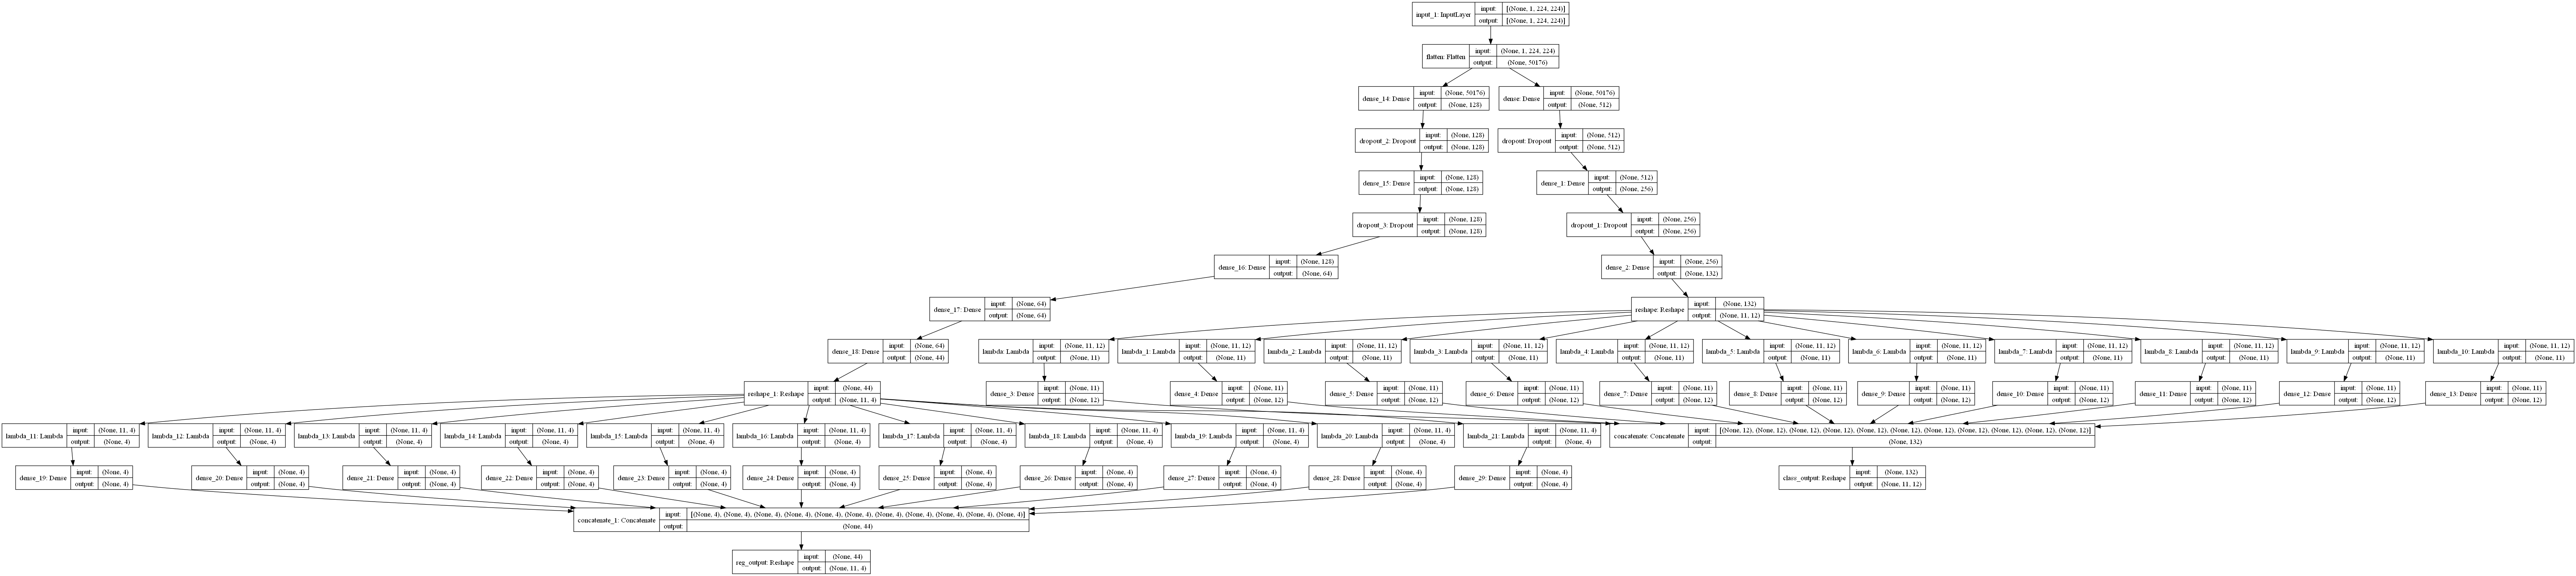

In [ ]:
plot_model(model, to_file='model_diagram.png', show_shapes=True)

In [ ]:
#with tf.device('/CPU:0'):
H = model.fit(X_train_ext, {'class_output': classes_train, 'reg_output': dims_train},
                    validation_data=(X_val_ext, {'class_output': classes_val, 'reg_output': dims_val}),
                    batch_size=8, epochs=200, callbacks= [callbacks])
model.save("annotations_multi_transformers.h5")

Epoch 1/200
230/230 [==============================] - 165s 710ms/step - loss: 3.7886 - class_output_loss: 2.2174 - reg_output_loss: 0.0491 - class_output_accuracy2: 0.2235 - reg_output_mae: 0.1037 - val_loss: 3.7054 - val_class_output_loss: 2.1460 - val_reg_output_loss: 0.0444 - val_class_output_accuracy2: 0.2428 - val_reg_output_mae: 0.0912
Epoch 2/200
230/230 [==============================] - 186s 808ms/step - loss: 3.6237 - class_output_loss: 2.0729 - reg_output_loss: 0.0426 - class_output_accuracy2: 0.1478 - reg_output_mae: 0.0927 - val_loss: 3.5155 - val_class_output_loss: 1.9745 - val_reg_output_loss: 0.0398 - val_class_output_accuracy2: 0.1167 - val_reg_output_mae: 0.0862
Epoch 3/200
230/230 [==============================] - 169s 736ms/step - loss: 3.2502 - class_output_loss: 1.7173 - reg_output_loss: 0.0385 - class_output_accuracy2: 0.1136 - reg_output_mae: 0.0887 - val_loss: 2.7293 - val_class_output_loss: 1.2055 - val_reg_output_loss: 0.0362 - val_class_output_accuracy2: 0

In [ ]:
N = 100
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["class_output_loss"], label="train_class_loss")
plt.plot(np.arange(0, N), H.history["reg_output_loss"], label="train_reg_loss")
plt.plot(np.arange(0, N), H.history["class_output_accuracy2"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["reg_output_mae"], label="train_mae")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["val_class_output_loss"], label="val_class_loss")
plt.plot(np.arange(0, N), H.history["val_reg_output_loss"], label="val_reg_loss")
plt.plot(np.arange(0, N), H.history["val_class_output_accuracy2"], label="val_accuracy")
plt.plot(np.arange(0, N), H.history["val_reg_output_mae"], label="val_mae")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
def inv_minmax_scaler(val, minn, maxx):
    return ((val *(maxx-minn))+ minn)

In [ ]:
get_annotations(path)

In [ ]:
def plot(img_path, xml_path):



    img = cv2.imread(img_path)
    img2 = cv2.resize(img, (w, l))
    img= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img= np.expand_dims(img, axis=0)
    img= np.reshape(img, (1, 1, 224, 224))
    img = feature_extractor(img, return_tensors='tf')
    img = img['pixel_values'].numpy()


    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img2, cmap = 'gray')

    pred= model.predict(img)
    real= get_annotations(xml_path)

    i=0
    while(np.argmax(pred[0][0][i])!= 11):

        name = np.argmax(pred[0][0][i])
        xmin = inv_minmax_scaler(pred[1][0][i][0], xmin_min, xmin_max)
        ymin = inv_minmax_scaler(pred[1][0][i][1], ymin_min, ymin_max)
        xmax = inv_minmax_scaler(pred[1][0][i][2], xmax_min, xmax_max)
        ymax = inv_minmax_scaler(pred[1][0][i][3], ymax_min, ymax_max)

        if xmin > xmax:
            temp = xmin
            xmin = xmax
            xmax = temp
        if ymin > ymax:
            temp = ymin
            ymin = ymax
            ymax = temp
#         print(xmin, ymin, xmax, ymax)

        width_rec = xmax - xmin
        height_rec = ymax - ymin

        rect = plt.Rectangle((xmin, ymin), width_rec, height_rec, fill=False, edgecolor='red')
        ax.add_patch(rect)
        plt.text(xmin+width_rec/2, ymin+height_rec/2, f'pred {mapping2[name]}', color='red', ha='center', va='center')

        if i<= len(real)-1:
            name = real[i][0]
            xmin = real[i][1]
            ymin = real[i][2]
            xmax = real[i][3]
            ymax = real[i][4]

            if xmin > xmax:
                temp = xmin
                xmin = xmax
                xmax = temp
            if ymin > ymax:
                temp = ymin
                ymin = ymax
                ymax = temp

#             print(xmin, ymin, xmax, ymax)
            width_rec = xmax - xmin
            height_rec = ymax - ymin

            rect2 = plt.Rectangle((xmin, ymin), width_rec, height_rec, fill=False, edgecolor='blue')
            ax.add_patch(rect2)
            plt.text(xmin+width_rec/2, ymin+height_rec/2, f'real {mapping2[name]}', color='blue', ha='center', va='center')

        i+=1

    plt.show()

In [ ]:
x=90
xml_path= fr'lable/punching_hole ({x}).xml'
path= fr'gc10det/punching_hole/punching_hole ({x}).jpg'
plot(path, xml_path)